## Proceso de Poisson compuesto

Un **proceso de Poisson compuesto** \( \{X(t)\}_{t \ge 0} \) se construye a partir de:

1. Un proceso de Poisson \( \{N(t)\}_{t \ge 0} \) homogéneo con tasa \( \lambda > 0 \).
2. Una sucesión de variables aleatorias independientes
   \[
   Y_1, Y_2, \dots
   \]
   (todas con la misma distribución) e independientes del proceso \(N(t)\).

Entonces definimos
\[
X(t) = \sum_{k=1}^{N(t)} Y_k.
\]

Interpretación:

- \(N(t)\) cuenta cuántos eventos han ocurrido hasta el tiempo \(t\).
- Cada evento \(k\) trae asociado un **tamaño de salto** \(Y_k\).
- \(X(t)\) es la **suma acumulada** de todos los saltos hasta el tiempo \(t\).

Ejemplos:

- En seguros: \(N(t)\) = número de siniestros, \(Y_k\) = costo del siniestro \(k\),
  entonces \(X(t)\) = pérdida total acumulada.
- En redes: \(N(t)\) = número de paquetes, \(Y_k\) = tamaño del paquete \(k\),
  entonces \(X(t)\) = volumen total de tráfico.

---

### Algoritmo de simulación

Para simular \(X(t)\) en un intervalo \([0, T]\):

1. Simulamos el proceso de Poisson \(N(t)\) (homogéneo) con tasa \(\lambda\) en \([0, T]\):
   - Generamos tiempos entre llegadas \(S_k \sim \text{Exp}(\lambda)\).
   - Construimos los tiempos de llegada:
     \[
     T_1 = S_1,\quad
     T_2 = S_1 + S_2,\quad
     \dots
     \]
   - Nos quedamos con los tiempos \(T_1, \dots, T_n\) que caen en \([0, T]\).

2. Para cada llegada \(T_k\), generamos un tamaño de salto
   \[
   Y_k \sim \text{(distribución de saltos)},
   \]
   por ejemplo exponencial, normal, discreta, etc.

3. Construimos la suma acumulada:
   \[
   X(T_k) = \sum_{i=1}^k Y_i.
   \]

4. El proceso \(X(t)\) es escalonado:
   - \(X(0) = 0\).
   - Entre llegadas, \(X(t)\) se mantiene constante.
   - En cada \(T_k\), salta en una cantidad \(Y_k\).

---

### Pseudocódigo

```text
Entrada: tasa λ, horizonte T, función jump_sampler
Salida: tiempos de llegada T[1..n], saltos Y[1..n], valores X[1..n]

1. arrival_times ← simular tiempos de llegada del Poisson homogéneo (λ) en [0, T]
2. n ← número de llegadas (longitud de arrival_times)

3. Si n = 0:
       devolver arrival_times vacío, X vacío, Y vacío

4. Generar Y[1..n] ← jump_sampler(n)  # tamaños de salto

5. X[1] ← Y[1]
   Para k = 2, ..., n:
       X[k] ← X[k-1] + Y[k]  # suma acumulada

6. Devolver arrival_times, X, Y


In [1]:

import os
import sys

def find_repo_root(marker="src"):
    """
    Sube directorios hacia arriba desde el directorio actual hasta encontrar
    uno que contenga una carpeta llamada `marker` (por defecto 'src').
    """
    cwd = os.getcwd()
    while True:
        if marker in os.listdir(cwd):
            return cwd
        parent = os.path.dirname(cwd)
        if parent == cwd:  # llegamos a la raíz del sistema
            return None
        cwd = parent

repo_root = find_repo_root("src")
print("Directorio actual:", os.getcwd())
print("Raíz del repo detectada:", repo_root)

if repo_root is None:
    raise RuntimeError("No se encontró una carpeta 'src' en los directorios superiores.")

# Añadimos la raíz del repo al sys.path
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

print("Primeras entradas de sys.path:")
for p in sys.path[:5]:
    print("  ", p)


Directorio actual: c:\Users\mator\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\9 Sem\Estocásticos\procesosEstocasticosTeam5\notebooks
Raíz del repo detectada: c:\Users\mator\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\9 Sem\Estocásticos\procesosEstocasticosTeam5
Primeras entradas de sys.path:
   c:\Users\mator\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\9 Sem\Estocásticos\procesosEstocasticosTeam5
   c:\Users\mator\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\9 Sem\Estocásticos\procesosEstocasticosTeam5\notebooks
   c:\Users\mator\anaconda3\python311.zip
   c:\Users\mator\anaconda3\DLLs
   c:\Users\mator\anaconda3\Lib


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from src.poisson.compuesto import simulate_compound_poisson

# Parámetros del proceso
lam = 2.0      # tasa del Poisson base
T = 5.0        # horizonte de tiempo
rng = np.random.default_rng(seed=123)

# Definimos una distribución para los saltos Y_k
# Ejemplo: saltos exponenciales de media 1
def jump_sampler(rng, size):
    return rng.exponential(scale=1.0, size=size)

arrival_times, X_vals, jumps = simulate_compound_poisson(
    lam=lam,
    T=T,
    jump_sampler=jump_sampler,
    rng=rng
)

print("Número de llegadas:", len(arrival_times))
print("Tiempos de llegada:", arrival_times)
print("Saltos Y_k:", jumps)
print("Valores X(T_k):", X_vals)


Número de llegadas: 10
Tiempos de llegada: [0.29848625 0.35700178 0.48289913 0.63688185 0.68278318 1.85859361
 4.00282778 4.08014424 4.32900378 4.7421466 ]
Saltos Y_k: [0.36474195 1.63032738 0.46823472 0.7597723  0.80914685 1.19123792
 0.14624935 0.50395602 0.27691666 0.3781471 ]
Valores X(T_k): [0.36474195 1.99506933 2.46330406 3.22307635 4.0322232  5.22346112
 5.36971047 5.87366649 6.15058315 6.52873026]


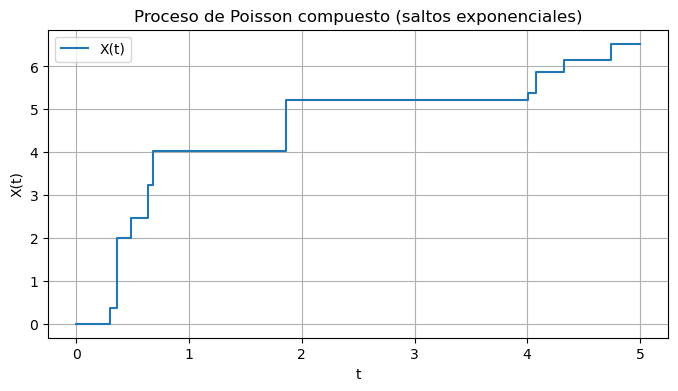

In [3]:
if len(arrival_times) == 0:
    print("No hubo eventos en [0, T]")
else:
    # Construimos el proceso escalonado X(t)
    # t_vals: duplicamos cada tiempo de llegada para el dibujo tipo escalera
    t_vals = [0.0]
    X_step = [0.0]

    for t, x in zip(arrival_times, X_vals):
        # tramo horizontal hasta justo antes del salto
        t_vals.append(t)
        X_step.append(X_step[-1])
        # punto después del salto
        t_vals.append(t)
        X_step.append(x)

    # Extendemos hasta T manteniendo el último valor
    t_vals.append(T)
    X_step.append(X_step[-1])

    t_vals = np.array(t_vals)
    X_step = np.array(X_step)

    plt.figure(figsize=(8, 4))
    plt.step(t_vals, X_step, where="post", label="X(t)")
    plt.xlabel("t")
    plt.ylabel("X(t)")
    plt.title("Proceso de Poisson compuesto (saltos exponenciales)")
    plt.grid(True)
    plt.legend()
    plt.show()


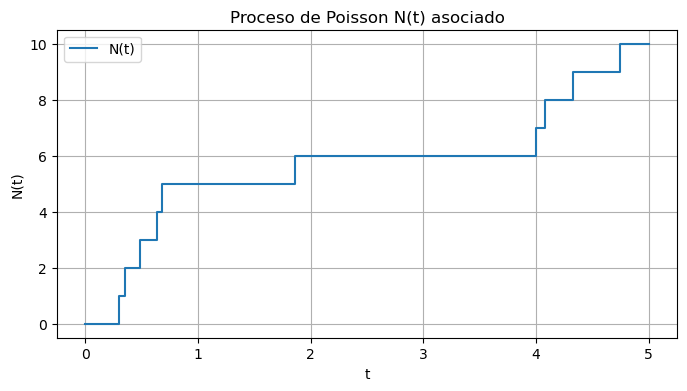

In [4]:
if len(arrival_times) > 0:
    # Construimos N(t)
    tN_vals = np.concatenate(([0.0], np.repeat(arrival_times, 2), [T]))
    n_events = np.arange(len(arrival_times) + 1)
    N_vals = np.repeat(n_events, 2)
    tN_vals[-1] = T

    plt.figure(figsize=(8, 4))
    plt.step(tN_vals, N_vals, where="post", label="N(t)")
    plt.xlabel("t")
    plt.ylabel("N(t)")
    plt.title("Proceso de Poisson N(t) asociado")
    plt.grid(True)
    plt.legend()
    plt.show()
